<h1 align=center> T.P : Évaluation de l'algorithme de K-NN via une Cross Validation </h1>

<h2 align=center>CentraleSupélec-OpenClassrooms Certifiyng Training</h2>

<h3 align=center>Jean Martial Tagro </h3>

On considère un jeu de données qui contient des informations physico-chimiques de vins portugais (vinho verde), ainsi que leur qualité telle que notée par des humains.
Le problème, sur ces données, est de prédire automatiquement la qualité sur la base de ces informations, afin d’assister le travail d’évaluation des œnologues, d’améliorer la production de vin, et de cibler le goût des consommateurs sur des marchés de niche (petit segment de marché).

In [2]:
import pandas as pd

In [3]:
# import numpy et matplotlib à la fois !
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### 1. Obtention du dataset

In [4]:
data = pd.read_csv('winequality-white.csv', sep=";")

In [5]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [6]:
#data.head()
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [7]:
# Extraction en 2 arrays numpy les points et étiquettes
X = data[data.columns[:-1]].values
y = data['quality'].values

In [8]:
#tests
#print(data[data.columns[:-1]])
#print(data[data.columns[:-1]].values)

### Observation de la distribution des 11 variables

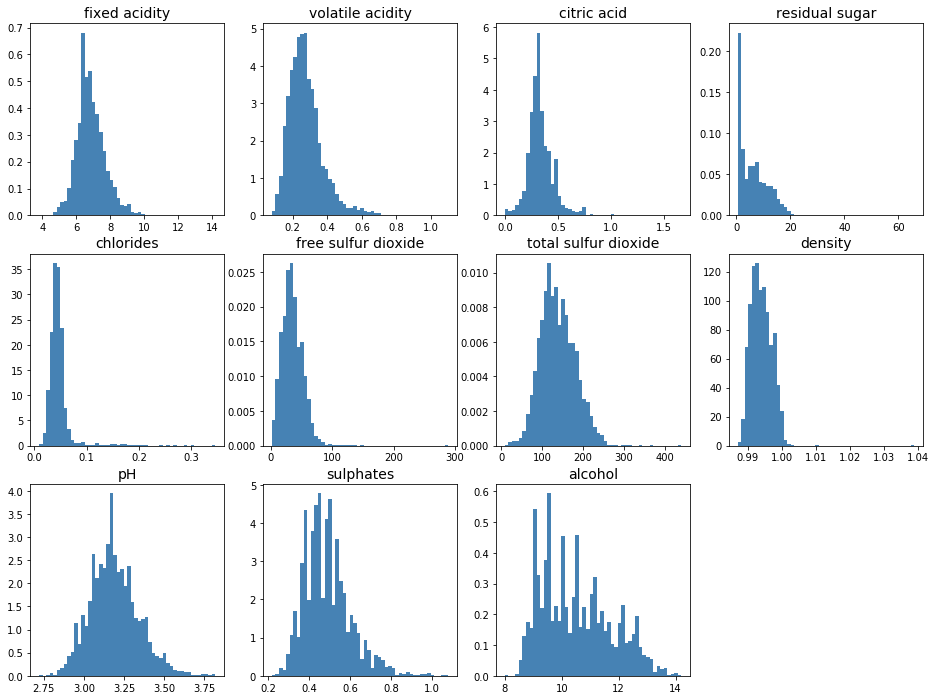

In [9]:
# Representation
fig = plt.figure(figsize=(16,12))

for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

On remarque en particulier que ces variables prennent des valeurs dans des ensembles différents. Par exemple, “sulphates” varie de 0 à 1 tandis que “total sulfur dioxide” varie de 0 à 440. Il va donc nous falloir <b>standardiser</b> les données pour que la deuxième ne domine pas complètement la première.

### 2. Sélection de modèle

#### 2.1 Transformation du problème en problème de classification

In [10]:
# On crée 2 classes : quality < 6 (pas terrible) / quality > 6 (bon vin)
y_class = np.where(y<6, 0, 1)

#### 2.2. Training/test split

In [11]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class, train_size=0.7)

#### 2.3 Standardisation des features 
##### Attention : on ne va évidemment pas standardiser  les étiquettes

In [12]:
from sklearn import preprocessing

#On standardise les données d’entraînement
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)

#et appliquer la même transformation aux données de test
X_test_std = std_scale.transform(X_test)

On peut visualiser de nouveau les données pour vérifier que les différentes variables prennent des valeurs qui ont maintenant des ordres de grandewur similaires.

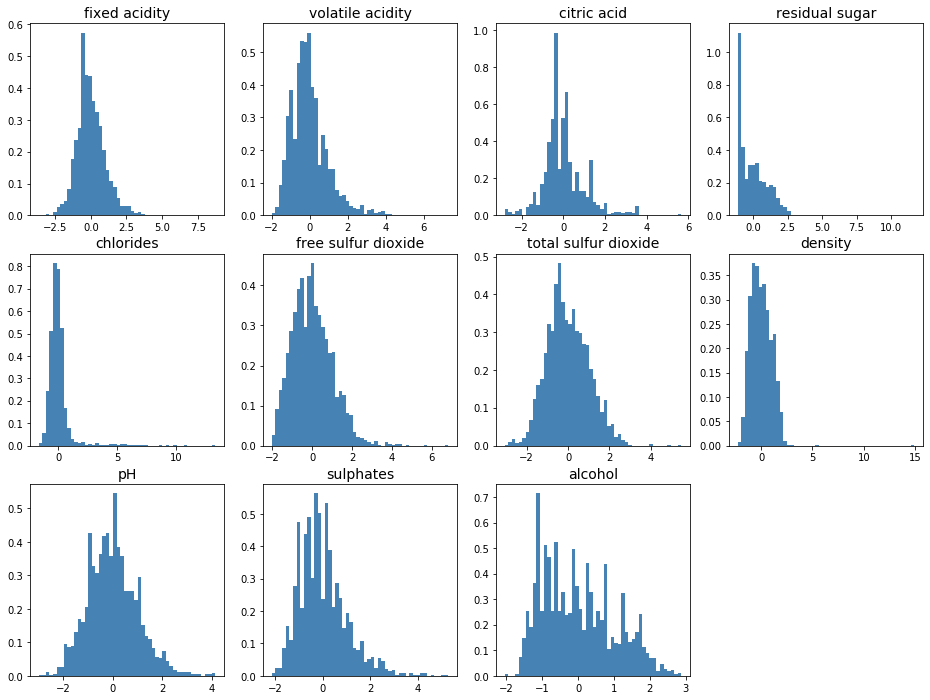

In [13]:
# Representation
fig = plt.figure(figsize=(16,12))

for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

Nous allons maintenant utiliser la méthode <strong>GridSearchCV</strong> pour faire une validation croisée du paramètre k d’un kNN (le nombre de plus proches voisins) sur le jeu d’entraînement :

In [14]:
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 5}
Résultats de la validation croisée :
accuracy = 0.765 (+/-0.034) for {'n_neighbors': 3}
accuracy = 0.766 (+/-0.033) for {'n_neighbors': 5}
accuracy = 0.765 (+/-0.033) for {'n_neighbors': 7}
accuracy = 0.762 (+/-0.021) for {'n_neighbors': 9}
accuracy = 0.761 (+/-0.023) for {'n_neighbors': 11}
accuracy = 0.761 (+/-0.021) for {'n_neighbors': 13}
accuracy = 0.757 (+/-0.022) for {'n_neighbors': 15}


Nous pouvons maintenant regarder la performance sur le jeu de test. GridSearchCV a automatiquement ré-entraîné le meilleur modèle sur l’intégralité du jeu d’entraînement;

In [15]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.751


#### Cette performance finale du 9-NN est légèrement inférieure à celle du 9-NN en validation croisée. Cela confirme le fait que : <i><h3>La performance en validation croisée d'un modèle peut être un peu biaisée par rapport à la performance du modèle sur un jeu de test extérieur.</h3></i>

--------------------

-------

### 3. Evaluation via la courbe ROC (Toutes les erreurs ne se valent pas !)

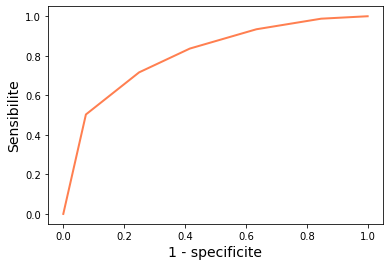

0.8045184854644918


In [25]:
# traçage de la courbe ROC du classifieur étudié précédemment
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]

#print(clf.predict_proba(X_test_std))

[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba) # fpr: FP rate, tpr: TP rate ...

plt.plot(fpr, tpr, color='coral', lw=2)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)
plt.show()

# Calcul de l'AUROC
print(metrics.auc(fpr, tpr))

#### Obtention du seuil

![Title](Obtention_seuil.png)

In [27]:
# On cherche d'abord l'indice du premier seuil pour lequel la sensibilité > 0.95 (--> FNR < 5%)
index = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[index]))
print("Spécificité : {:.2f}".format(1-fpr[index]))
print("Seuil : {:.2f}".format(thr[index]))

Sensibilité : 0.99
Spécificité : 0.15
Seuil : 0.20


Utiliser un seuil de 0.2 nous garantit une sensibilité de 0.99 et un F.N.R < 5%.